In [157]:
import pandas as pd
import numpy as np

In [158]:
# 데이터 로드
ori_df = pd.read_csv('./2016.csv', encoding='euc-kr')

In [159]:
ori_df.head(5)

,구분,죄종,발생검거,건수
0,중부,살인,발생,2.0
1,중부,살인,검거,2.0
2,중부,강도,발생,3.0
3,중부,강도,검거,3.0
4,중부,강간,발생,141.0


In [160]:
# 피벗 테이블을 활용하여 데이터를 재구성한다
tmp_df = pd.pivot_table( ori_df, 
                        columns=['죄종'],
                        index=['구분'], 
                        values=['건수'] )
tmp_df.head(2)
# 발생검거가 기본 합산후 평균으로 바껴서 원하는 형태가 않되었다
#  발생과 검거는 데이터의 성격이 다름 

건수                           
죄종     강간    강도   살인      절도      폭력
구분                                  
강남  304.0  25.0  3.0  1783.5  2216.0
강동  156.0  13.5  4.5  1328.0  2365.5

In [161]:
# 발생검거라는 컬럼의 데이터가 발생인놈만 모아서 사본을 받아서 피벗처리 
df1           = ori_df[ ori_df[ '발생검거' ]=='발생' ]
tmp_df1 = pd.pivot_table( df1, 
                        columns=['죄종'],
                        index=['구분'], 
                        values=['건수'] )
# tmp_df1#.head(10)
newCol ={
        "강간":'강간 발생',
        "강도":'강도 발생',
        "살인":'살인 발생',
        "절도":'절도 발생',
        "폭력":'폭력 발생',
}
tmp_df1.rename( columns=newCol,  inplace=True )
tmp_df1.head(2)

건수                            
죄종  강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생
구분                                   
강남  339.0  24.0   3.0  2438.0  2336.0
강동  160.0  14.0   4.0  1754.0  2530.0

In [162]:
# 발생검거라는 컬럼의 데이터가 검거인놈만 모아서 사본을 받아서 피벗처리 
df2           = ori_df[ ori_df[ '발생검거' ]=='검거' ]
tmp_df2= pd.pivot_table( df2, 
                        columns=['죄종'],
                        index=['구분'], 
                        values=['건수'] )
tmp_df2.head(5)

건수                            
죄종     강간    강도    살인      절도      폭력
구분                                   
강남  269.0  26.0   3.0  1129.0  2096.0
강동  152.0  13.0   5.0   902.0  2201.0
강북  159.0   4.0   6.0   672.0  2482.0
강서  239.0  10.0  10.0  1070.0  2768.0
관악  264.0  10.0   7.0   937.0  2707.0

In [163]:
# 데이터 병합  ( tmp_df1, tmp_df2 병합을 한다, 어느 방향?)
# 행방향으로 병합
# 두개의 데이터가 같은 형태(shape)을 가지고 잇다 
# 2015년도 데이터와 동일 형태를 원한다 따라서, concat를 통한 단순 합치기
tmp = pd.concat( [ tmp_df1, tmp_df2  ], axis=1 )
tmp.head(2)

건수                                                              
죄종  강간 발생 강도 발생 살인 발생   절도 발생   폭력 발생     강간    강도   살인      절도      폭력
구분                                                                     
강남  339.0  24.0   3.0  2438.0  2336.0  269.0  26.0  3.0  1129.0  2096.0
강동  160.0  14.0   4.0  1754.0  2530.0  152.0  13.0  5.0   902.0  2201.0

In [164]:
# pandas 데이터프레임의 값 파트 변경작업
tmp = tmp.astype( np.int32 )
tmp.head(2)

건수                                                
죄종 강간 발생 강도 발생 살인 발생 절도 발생 폭력 발생   강간  강도 살인    절도    폭력
구분                                                      
강남   339    24     3  2438  2336  269  26  3  1129  2096
강동   160    14     4  1754  2530  152  13  5   902  2201

In [165]:
# 컬러명 2015년도 자료 기준으로 대체 혹은 수정
# 해보니, 컭럼명이 동일해서 문제가 발생=>병합전에 수정 처리
newCol ={
        "강간":'강간 검거',
        "강도":'강도 검거',
        "살인":'살인 검거',
        "절도":'절도 검거',
        "폭력":'폭력 검거',
}
tmp.rename( columns=newCol,  inplace=True )
tmp.head(2)

건수                                                      
죄종 강간 발생 강도 발생 살인 발생 절도 발생 폭력 발생 강간 검거 강도 검거 살인 검거 절도 검거 폭력 검거
구분                                                            
강남   339    24     3  2438  2336   269    26     3  1129  2096
강동   160    14     4  1754  2530   152    13     5   902  2201

In [166]:
# 중간값 저장(시작 데이터 저장)
tmp.to_csv( './2016_start.csv', sep=',', encoding='euc-kr' )

In [167]:
# 특정 행부터 데이터를 가져온다 
crime_per_police = pd.read_csv( './2016_start.csv',encoding='euc-kr', header=1)
crime_per_police.head(3)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
0,구분,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
2,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [168]:
crime_per_police.drop( [0], inplace=True )
crime_per_police.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
1,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
2,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [169]:
# 특정 컬럼을 인덱스로 설정
crime_per_police.set_index( '죄종', inplace=True )
crime_per_police.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [170]:
# 타입 보정
crime_per_police.astype(np.int32, inplace=True)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339,24,3,2438,2336,269,26,3,1129,2096
강동,160,14,4,1754,2530,152,13,5,902,2201
강북,217,5,7,1222,2778,159,4,6,672,2482
강서,275,10,9,1952,3204,239,10,10,1070,2768
관악,322,12,6,2103,3235,264,10,7,937,2707
광진,279,11,4,2636,2392,234,6,4,1057,2011
구로,273,10,9,1910,3164,181,13,9,861,2680
금천,175,7,6,1264,2193,143,7,6,654,1946
남대문,57,5,1,946,890,52,4,1,429,832


In [171]:
# 저장의 형태를 좀더 조정하거나, 아니면 데이터를 읽을때 조정하거나 해서 2015와 같은 형식 필요

In [172]:
# API를 이용한 http 통신을 통해서  획득
# requests, urllib, beautiful Soup, Selenium등등이 웹 크롤링 기술 대상 모듈
import requests
# 주소 <-> gps값 , 지형지물명 <-> 주소및 위치정보 획득 : 지오코더 (geocoder)
# kakao api 사용=>계정등록=>앱생성=>인증키 발급(restful  key)
# dev.kakao.com
KAKAO_API_KEY = 'fddb410c32edf2164996e6b8f3f9fb98'

In [173]:
url  = '''
https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
'''.format( '서울 중부 경찰서' )
headers = {
    'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
}
res = requests.get( url , headers=headers )

In [174]:
res = res.json()

In [175]:
print ( res['documents'][0]['address_name'],
res['documents'][0]['y'],
res['documents'][0]['x'],
res['documents'][0]['place_name'])

서울 중구 저동2가 62-1 37.5636199296203 126.98959144113 서울중부경찰서


### 범죄 통계 데이터에서 관할서에 대한 정보 추출

- 반복작업을 통해 kakao API를 활용 하여 주소, 위도, 경도등 획득

In [176]:
crime_per_police.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [177]:
crime_per_police.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='죄종')

In [178]:
# 검색어를 던져서 응답 데이터중에  주소, 위도, 경도, 질의어 리턴  함수
def netGetGeocoder(  query ):
    url  = '''
    https://dapi.kakao.com/v2/local/search/keyword.json?query={0}&category_group_code=PO3
    '''.format( query )
    headers = {
        'Authorization':'KakaoAK {0}'.format(KAKAO_API_KEY)
    }
    # API 쿼리 수행
    res = requests.get( url , headers=headers )
    res = res.json()
    # 데이터 리턴 : 주소, 위도, 경도, 질의어 순으로 튜플 형태로 리턴     
    return res['documents'][0]['address_name'], res['documents'][0]['y'],res['documents'][0]['x'], res['documents'][0]['place_name']

In [179]:
# 반복해서 관할서의 이름을 완성하여 출력(print)하시오
# 진행율
# pip install tqdm
from tqdm import tqdm_notebook

# 데이터를 담는 자료형
police_station_info = []

# 경찰서 이름 개수만큼 반복
for name in tqdm_notebook(crime_per_police.index):
    # 검색어 획득
    query = '서울%s경찰서' % name
    #print( '서울%s경찰서' % name )
    police_station_info.append( netGetGeocoder( query  ) )

police_station_info

[('서울 강남구 대치동 998', '37.5093899463715', '127.067070541137', '서울강남경찰서'),
 ('서울 강동구 성내동 541-1', '37.5286763457485', '127.126894359114', '서울강동경찰서'),
 ('서울 강북구 번동 415-15', '37.637408362838', '127.027340967017', '강북경찰서'),
 ('서울 강서구 화곡동 980-27',
  '37.5513470867979',
  '126.849886071842',
  '서울강서경찰서(2020년예정)'),
 ('서울 관악구 봉천동 1695-5', '37.4745875338795', '126.951062346192', '서울관악경찰서'),
 ('서울 광진구 구의동 254-32', '37.5428136101647', '127.083842771963', '서울광진경찰서'),
 ('서울 구로구 구로동 436', '37.4948844667899', '126.886660285169', '서울구로경찰서'),
 ('서울 금천구 시흥동 산 189', '37.45725314643252', '126.89674921449215', '서울금천경찰서'),
 ('서울 중구 남대문로5가 567', '37.55478043476484', '126.97349729923079', '서울남대문경찰서'),
 ('서울 노원구 하계동 250', '37.6423345266253', '127.071404832413', '서울노원경찰서'),
 ('서울 도봉구 창동 17', '37.6533976253312', '127.052708256522', '서울도봉경찰서'),
 ('서울 동대문구 청량리동 229', '37.5850804205685', '127.045762797538', '서울동대문경찰서'),
 ('서울 동작구 노량진동 72-35', '37.5131469479959', '126.942857105642', '서울동작경찰서'),
 ('서울 마포구 아현동 618-1', '3

In [180]:
# 위도만 추출해서 리스트로 출력 -> df에 컬럼 삽입을 해야 하므로
lat = []
for station in police_station_info:
    #print( station[ 1 ] )
    lat.append( station[ 1 ]  )
lat

['37.5093899463715',
 '37.5286763457485',
 '37.637408362838',
 '37.5513470867979',
 '37.4745875338795',
 '37.5428136101647',
 '37.4948844667899',
 '37.45725314643252',
 '37.55478043476484',
 '37.6423345266253',
 '37.6533976253312',
 '37.5850804205685',
 '37.5131469479959',
 '37.5510118582052',
 '37.48155944749938',
 '37.5649023404956',
 '37.61273115700761',
 '37.4956126696023',
 '37.5617947420747',
 '37.58989767143614',
 '37.5019775317251',
 '37.4934972653425',
 '37.5165549067037',
 '37.52585220719',
 '37.5411811395942',
 '37.6285242467996',
 '37.5755413947569',
 '37.602095614954',
 '37.6182390801576',
 '37.5636199296203',
 '37.5718915247338']

In [181]:
#리스트 내포
# addrs, lats, lngs,  names 준비
addrs   = [ station[ 0 ] for station in police_station_info ]
lats       = [ station[ 1 ] for station in police_station_info ]
lngs      = [ station[ 2 ] for station in police_station_info ]
names = [ station[ 3 ] for station in police_station_info ]

In [182]:
crime_per_police.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거
죄종,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0


In [183]:
# crime_per_police 정보에  자치구 정보가 없다 -> 자치구 : XX구  데이터 추가 필요
# addrs -> 구를 획득 => 컬럼 추가
# 
tmp_gu = []
for addr in addrs:
     if addr:
        # 분해
        tmp_gu.append( addr.split()[1] )
        
# 리스트 내포
# tmp_gu = [  addr.split()[1] for addr in addrs  if addr  ]
# 위의 명령 한줄로 만든거


In [184]:
crime_per_police[ '자치구' ] = tmp_gu

In [185]:
# 키 역활을 담당할 자치구 컬럼의 unique 조사
len(crime_per_police['자치구'].unique())
crime_per_police['자치구'].unique()
# 주소에서 자치구를 추출하다  보니  실제 소속 자치구와 일치하지 않는 관할서가 있다
#  금천 -> 관악구 => 금천구 대체

array(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '중구',
       '노원구', '도봉구', '동대문구', '동작구', '마포구', '서초구', '서대문구', '은평구', '성동구',
       '성북구', '송파구', '양천구', '영등포구', '용산구', '종로구', '중랑구'], dtype=object)

In [186]:
# 데이터 보정 (해당 분야의 지식이 있을 경우 유리 (보정사항체크하는데))
# 금천 -> 관악구 => 금천구 대체,  수행
# 강서 -> 양천구 => 강서구 대체
# 표현이 복잡해짐
#crime_per_police[ crime_per_police['자치구']=='양천구'  ]
crime_per_police.loc['강서', '자치구']='강서구'
crime_per_police.loc['금천', '자치구']='금천구'

In [187]:
print( len(crime_per_police['자치구'].unique()) )
crime_per_police

25


,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
죄종,,,,,,,,,,,
강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구
강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구
강북,217.0,5.0,7.0,1222.0,2778.0,159.0,4.0,6.0,672.0,2482.0,강북구
강서,275.0,10.0,9.0,1952.0,3204.0,239.0,10.0,10.0,1070.0,2768.0,강서구
관악,322.0,12.0,6.0,2103.0,3235.0,264.0,10.0,7.0,937.0,2707.0,관악구
광진,279.0,11.0,4.0,2636.0,2392.0,234.0,6.0,4.0,1057.0,2011.0,광진구
구로,273.0,10.0,9.0,1910.0,3164.0,181.0,13.0,9.0,861.0,2680.0,구로구
금천,175.0,7.0,6.0,1264.0,2193.0,143.0,7.0,6.0,654.0,1946.0,금천구
남대문,57.0,5.0,1.0,946.0,890.0,52.0,4.0,1.0,429.0,832.0,중구


In [188]:
# 데이터 저장  (crime_analysis_mid_save.csv)
crime_per_police.to_csv('./crime_analysis_mid_save.csv',
                       sep=',', encoding='euc-kr')

### 피벗 테이블 기능 학습

In [189]:
# 데이터 로드
crime_per_police_raw = pd.read_csv(
                './crime_analysis_mid_save.csv', encoding='euc-kr' )

In [190]:
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
0,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구
1,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구


In [191]:
# 피벗 테이블을 이용하여 "자치구" 기준으로 데이터를 정리하시오
# (행이 총 25개가 나와야한다)
crime_anal = pd.pivot_table( crime_per_police_raw, index='자치구', 
                                                        aggfunc=np.sum )

In [192]:
len(crime_anal.index)

25

In [193]:
crime_anal.head(2)

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생
자치구,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0


In [194]:
# 검거율 = 검거 / 발생 * 100
# 5대 범죄에 대한 검거율을 각각 추가한다 
crime_anal['폭력검거율'] = crime_anal['폭력 검거']/crime_anal['폭력 발생'] * 100
crime_anal['절도검거율'] = crime_anal['절도 검거']/crime_anal['절도 발생'] * 100
crime_anal['살인검거율'] = crime_anal['살인 검거']/crime_anal['살인 발생'] * 100
crime_anal['강도검거율'] = crime_anal['강도 검거']/crime_anal['강도 발생'] * 100
crime_anal['강간검거율'] = crime_anal['강간 검거']/crime_anal['강간 발생'] * 100
crime_anal.head(10)
# 수치가 100% 넘는 데이터들은 원천 통계데이터의 이전년도 누락분이 예상된다

,강간 검거,강간 발생,강도 검거,강도 발생,살인 검거,살인 발생,절도 검거,절도 발생,폭력 검거,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,,,,,,
강남구,413.0,516.0,42.0,39.0,5.0,5.0,1918.0,3587.0,3527.0,4002.0,88.130935,53.470867,100.000000,107.692308,80.038760
강동구,152.0,160.0,13.0,14.0,5.0,4.0,902.0,1754.0,2201.0,2530.0,86.996047,51.425314,125.000000,92.857143,95.000000
강북구,159.0,217.0,4.0,5.0,6.0,7.0,672.0,1222.0,2482.0,2778.0,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,239.0,275.0,10.0,10.0,10.0,9.0,1070.0,1952.0,2768.0,3204.0,86.392010,54.815574,111.111111,100.000000,86.909091
관악구,264.0,322.0,10.0,12.0,7.0,6.0,937.0,2103.0,2707.0,3235.0,83.678516,44.555397,116.666667,83.333333,81.987578
광진구,234.0,279.0,6.0,11.0,4.0,4.0,1057.0,2636.0,2011.0,2392.0,84.071906,40.098634,100.000000,54.545455,83.870968
구로구,181.0,273.0,13.0,10.0,9.0,9.0,861.0,1910.0,2680.0,3164.0,84.702908,45.078534,100.000000,130.000000,66.300366
금천구,143.0,175.0,7.0,7.0,6.0,6.0,654.0,1264.0,1946.0,2193.0,88.736890,51.740506,100.000000,100.000000,81.714286
노원구,142.0,159.0,9.0,6.0,6.0,5.0,740.0,1857.0,2124.0,2516.0,84.419714,39.849219,120.000000,150.000000,89.308176


In [195]:
# 검거 컬럼을 모두 제거
del crime_anal['강간 검거']
del crime_anal['강도 검거']
del crime_anal['절도 검거']
del crime_anal['살인 검거']
del crime_anal['폭력 검거']

In [196]:
crime_anal.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,88.130935,53.470867,100.0,107.692308,80.03876
강동구,160.0,14.0,4.0,1754.0,2530.0,86.996047,51.425314,125.0,92.857143,95.00000


In [197]:
# 전년도 데이터가 실수(의도) 들어가 잇어서 100을 초과하는 데이터 -> 100 일괄 정리
# 사건 발생 연도와 검거 년도가 달라서 나오는 오류일수도 있다
target_col = [ '폭력검거율', '절도검거율', '살인검거율','강도검거율', '강간검거율']
#tmp = crime_anal.copy()

for col in target_col:
    # 해당 컬럼의 값이 100이 넘으면 -> True 그 행의 컬럼값을 100으로 바꿔라
    crime_anal.loc[ crime_anal[col] > 100, col  ] = 100

crime_anal.head(2)

,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,88.130935,53.470867,100.0,100.000000,80.03876
강동구,160.0,14.0,4.0,1754.0,2530.0,86.996047,51.425314,100.0,92.857143,95.00000


In [198]:
# 컬럼명 변경
crime_anal.rename( columns={'강간 발생':'강간','강도 발생':'강도',
                            '살인 발생':'살인','절도 발생':'절도','폭력 발생':'폭력',}, inplace=True )
crime_anal.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,516.0,39.0,5.0,3587.0,4002.0,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,160.0,14.0,4.0,1754.0,2530.0,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,217.0,5.0,7.0,1222.0,2778.0,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,275.0,10.0,9.0,1952.0,3204.0,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,322.0,12.0,6.0,2103.0,3235.0,83.678516,44.555397,100.000000,83.333333,81.987578


In [199]:
# 데이터 조정 작업
# 살인사건은 5,4 한자리수, 절도, 폭력 4자리수 
# 숫자를 같은 범위에 두고 비교하는것이 명확하고 직관적으로 보임
# 최대값을 1로 두고 정규화 진행(nomalize) 진행 -> 종합적으로 비교 

In [200]:
# 파이썬의 머신러닝 scikit-learn 에 있는 전처리 도구를 사용 최대, 최소값을 활용 정규화
from sklearn import preprocessing

In [201]:
# 대상
#crime_anal.columns
col = ['강간', '강도', '살인', '절도', '폭력']
# 대상 컬럼의 데이터 획득
x = crime_anal[ col ].values
# 전처리 모듈의 최대, 최소 스캐너 함수
min_max_scaler =  preprocessing.MinMaxScaler()
# min_max_scaler(  float형태값이 들어감  )함수 사용 데이터 받음
x_sacled = min_max_scaler.fit_transform( x )


In [202]:
# 데이터 프레임 생성
crime_anal_normal = pd.DataFrame( x_sacled, columns=col, index=crime_anal.index )
crime_anal_normal.head()

,강간,강도,살인,절도,폭력
자치구,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000
강동구,0.135922,0.305556,0.1,0.326351,0.425225
강북구,0.274272,0.055556,0.4,0.130834,0.522062
강서구,0.415049,0.194444,0.6,0.399118,0.688403
관악구,0.529126,0.250000,0.3,0.454612,0.700508


In [203]:
# 컬럼 추가를 1개가 아닌 5개를 동시에 처리하는 표현
crime_anal_normal[ target_col ] = crime_anal[ target_col ]
crime_anal_normal.head()
# 단순비교를 위해서만 정규화를 한개 아니라 => 시각화를 위해도 목적이 있다

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율
자치구,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578


In [204]:
# step1의 결과를 가져오기
f = './cctv_result.csv'
result_CCTV = pd.read_csv(f, encoding='utf-8', index_col='자치구')
result_CCTV.head(2)

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
자치구,,,,,,,,,,
강남구,3238,162.277027,551888,546952,4936,66011,0.894384,11.960941,0.586713,1561.929921
강동구,1010,210.419727,437050,432749,4301,57680,0.984098,13.197575,0.231095,-541.597345


In [205]:
# result_CCTV의 데이터중 소계와 인구수를 가져와서 crime_anal_normal에 CCTV, 인구수
# 라는 컬럼명으로 데이터를 추가후 샘플로 상위 2개만 출력하시오 => 2줄
# crime_anal_normal 와 result_CCTV 데이터의 순서가 일치 했기 때문에 그냥 짤러서 붙인것
# 기본적으로 순서가 다를 경우 (index 가 구성은 같고 순서가 다른 경우는 머지 하시거나, 정렬후 처리)
crime_anal_normal[  ['CCTV', '인구'] ] = result_CCTV[  ['소계','인구']  ]
crime_anal_normal.head(2)

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구
자치구,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.0,100.000000,80.03876,3238,551888
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.0,92.857143,95.00000,1010,437050


In [206]:
# 발생건수 합산 -> 범죄 추가
# col 을 사용
# 해당 컬럼의 값들을 획득 -> 행방향 합산값 =-> 컬럼 추가
crime_anal_normal['범죄'] = np.sum( crime_anal_normal[col], axis=1 )
crime_anal_normal.head(2)

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구,범죄
자치구,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.0,100.000000,80.03876,3238,551888,4.200000
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.0,92.857143,95.00000,1010,437050,1.293053


In [207]:
# 검거율 총계 => 컬럼명 :검거율 , target_col
crime_anal_normal['검거율'] = np.sum( crime_anal_normal[target_col], axis=1 )
crime_anal_normal.head(2)

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.0,100.000000,80.03876,3238,551888,4.200000,421.640561
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.0,92.857143,95.00000,1010,437050,1.293053,426.278504


### 향상된 시각화 도구 
- seaborn
- 칼라맵을 적극적 사용
- 산점도 표현 (데이터간의 성질 비교, 이상유무 확인)

In [210]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# 시각화 결과물을 주피터에 내장 시키기 위해 
%matplotlib inline
# 한글처리 
import platform
from matplotlib import font_manager, rc
# 한글처리
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    # 폰트 차후 확인
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')


In [211]:
crime_anal_normal.columns

Index(['강간', '강도', '살인', '절도', '폭력', '폭력검거율', '절도검거율', '살인검거율', '강도검거율',
       '강간검거율', 'CCTV', '인구', '범죄', '검거율'],
      dtype='object')

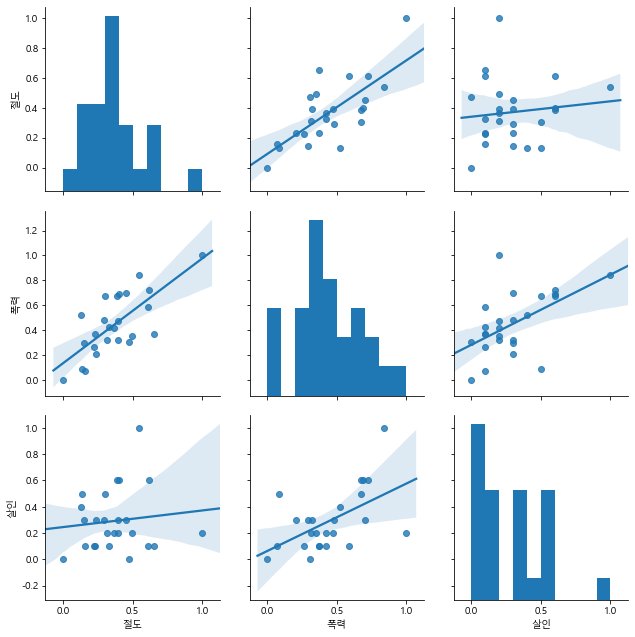

In [212]:
# 산점도를 그려서 변수간 관계성 확인
sns.pairplot(crime_anal_normal, vars=[ '절도','폭력','살인' ], kind='reg', height=3  )
plt.show()

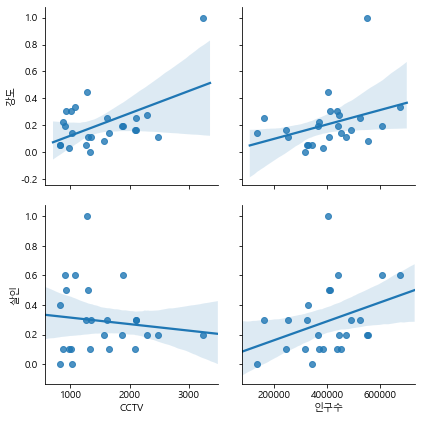

In [55]:
sns.pairplot(crime_anal_normal, 
                         x_vars=[ 'CCTV','인구수' ], 
                         y_vars=[ '강도','살인' ], 
                         kind='reg', size=3  )
plt.show()

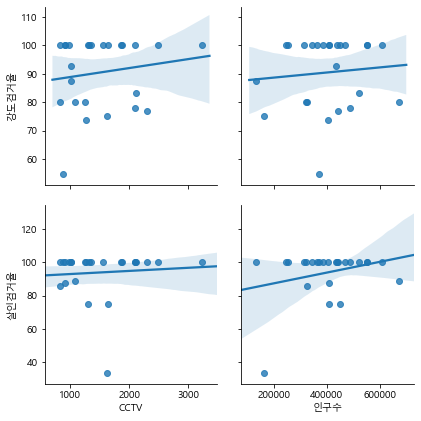

In [56]:
# 100% 데이터들 때문에 관계성 파일이 불가능하다
sns.pairplot(crime_anal_normal, 
                         x_vars=[ 'CCTV','인구수' ], 
                         y_vars=[ '강도검거율','살인검거율' ], 
                         kind='reg', size=3  )
plt.show()

In [214]:
crime_anal_normal.head()

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구,범죄,검거율
자치구,,,,,,,,,,,,,,
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,4.200000,421.640561
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,1.293053,426.278504
강북구,0.274272,0.055556,0.4,0.130834,0.522062,89.344852,54.991817,85.714286,80.000000,73.271889,831,326063,1.382723,383.322844
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,2.297014,428.116675
관악구,0.529126,0.250000,0.3,0.454612,0.700508,83.678516,44.555397,100.000000,83.333333,81.987578,2109,521960,2.234246,393.554824


In [215]:
# 검거율의 최고값 100이라고 한정하고, 나머지 정렬 
tmp_max = crime_anal_normal['검거율'].max()
crime_anal_normal['검거율'] = crime_anal_normal['검거율']/tmp_max *100

In [216]:
# 정렬해서 확인
crime_anal_normal_sort = crime_anal_normal.sort_values( by='검거율', ascending=False )
crime_anal_normal_sort

,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구,범죄,검거율
자치구,,,,,,,,,,,,,,
도봉구,0.046117,0.055556,0.0,0.000000,0.000000,90.839695,56.812933,100.000000,100.000000,98.373984,825,344096,0.101672,100.000000
성동구,0.000000,0.000000,0.1,0.158030,0.069504,86.967264,69.135802,100.000000,100.000000,75.000000,1327,316068,0.327534,96.654113
동대문구,0.208738,0.194444,0.2,0.394708,0.468957,89.969720,55.206186,100.000000,100.000000,83.157895,1870,364527,1.466848,96.033239
강서구,0.415049,0.194444,0.6,0.399118,0.688403,86.392010,54.815574,100.000000,100.000000,86.909091,911,606981,2.297014,95.984559
중랑구,0.145631,0.305556,0.5,0.303197,0.672784,85.714286,62.211709,87.500000,100.000000,91.463415,916,410296,1.927168,95.709404
강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.000000,92.857143,95.000000,1010,437050,1.293053,95.572437
금천구,0.172330,0.111111,0.3,0.146270,0.293635,88.736890,51.740506,100.000000,100.000000,81.714286,1348,252752,1.023346,94.656164
강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.000000,100.000000,80.038760,3238,551888,4.200000,94.532602
노원구,0.133495,0.083333,0.2,0.364204,0.419758,84.419714,39.849219,100.000000,100.000000,89.308176,1566,553177,1.200791,92.724761


In [217]:
target_col

['폭력검거율', '절도검거율', '살인검거율', '강도검거율', '강간검거율']

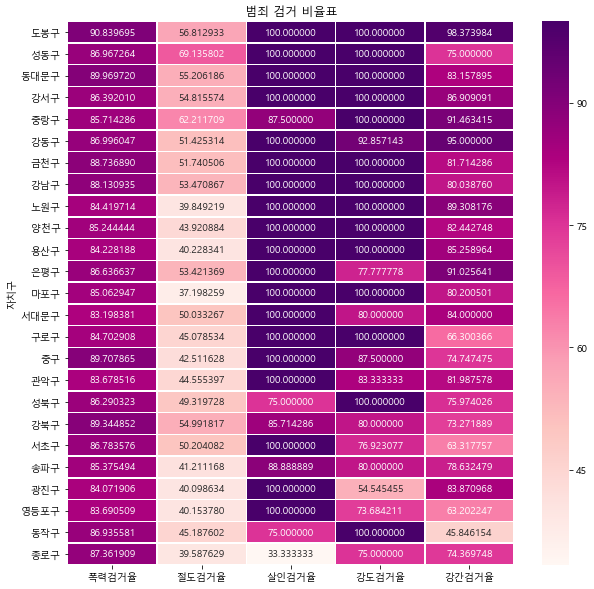

In [218]:
#  검거 기준 정렬 : crime_anal_normal_sort
plt.figure( figsize=(10,10) )
sns.heatmap(  crime_anal_normal_sort[ target_col ], annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
plt.title('범죄 검거 비율표')
plt.show()

In [219]:
# 5대 범죄 발생 통계 
col

['강간', '강도', '살인', '절도', '폭력']

In [220]:
# 5는 5대 범죄의 최대치(1.0)의 합산값의 최대치이다
crime_anal_normal['범죄'] = crime_anal_normal['범죄']/5
crime_anal_normal_sort      =  crime_anal_normal.sort_values(by='범죄', ascending=False)

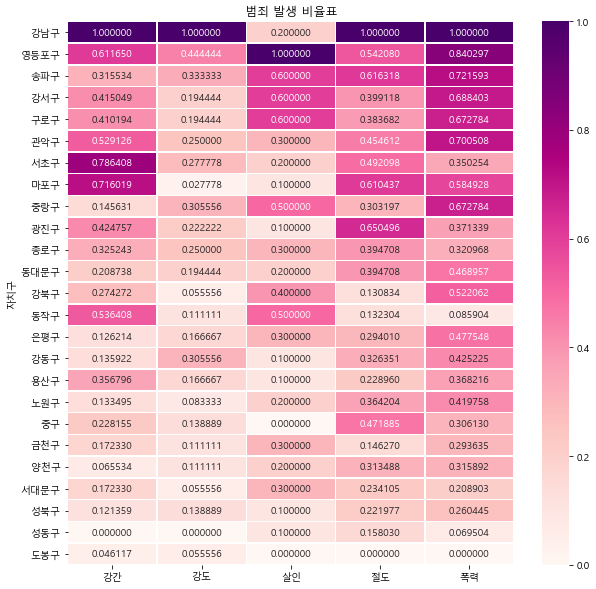

In [221]:
plt.figure( figsize=(10,10) )
sns.heatmap(  crime_anal_normal_sort[ col ], annot=True, fmt='f', linewidths=0.5, cmap='RdPu')
plt.title('범죄 발생 비율표')
plt.show()

In [223]:
# 데이터 저장
crime_anal_normal.to_csv('./crime_mid.csv', sep=',', encoding='euc-kr')

### 지도 시각화
- folium
- 시군구 gps 경계선 데이터 -> json 형태 제공

In [267]:
import json
geo_json = './seoul_gu.json'
geo_seoul_gu = json.load( open(geo_json, encoding='utf-8')  )
geo_seoul_gu

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [227]:
import folium

In [228]:
crime_anal_normal = pd.read_csv('./crime_mid.csv', encoding='euc-kr')
crime_anal_normal.head(2)

,자치구,강간,강도,살인,절도,폭력,폭력검거율,절도검거율,살인검거율,강도검거율,강간검거율,CCTV,인구,범죄,검거율
0,강남구,1.000000,1.000000,0.2,1.000000,1.000000,88.130935,53.470867,100.0,100.000000,80.03876,3238,551888,0.840000,94.532602
1,강동구,0.135922,0.305556,0.1,0.326351,0.425225,86.996047,51.425314,100.0,92.857143,95.00000,1010,437050,0.258611,95.572437


In [229]:
crime_anal_normal.set_index( '자치구', inplace=True )

In [269]:
map = folium.Map( location=[37.5442692,126.9665101], zoom_start=10 )
# 자치구별 표시 => 범죄 컬럼 기준 칼라맵 사용
map.choropleth( geo_data=geo_seoul_gu,  
               data=crime_anal_normal['범죄'],
               columns = [ crime_anal_normal.index,  crime_anal_normal['범죄'] ],
               key_on='feature.id',
               fill_color='YlGn',
               legend_name='자치구별 범죄 발생 비율'
              )
map

In [245]:
# 인구대비 범죄 비율시각화 , 백만명 기준
tmp_pop_crime_rate = crime_anal_normal['범죄'] / crime_anal_normal['인구'] * 1000000

map = folium.Map( location=[37.5442692,126.9665101], zoom_start=10 )
# 자치구별 표시 => 범죄 컬럼 기준 칼라맵 사용
map.choropleth( geo_data=geo_seoul_gu,  
               data=tmp_pop_crime_rate,
               columns = [ crime_anal_normal.index,  tmp_pop_crime_rate ],
               key_on='feature.id',
               fill_color='PuRd',
               legend_name='인구대비 범죄율(백만명기준)'
              )
map
# 강남구 영등포구, 종로구 3개구는 인구대비 범죄율이 높다

In [247]:
map = folium.Map( location=[37.5442692,126.9665101], zoom_start=10 )
# 자치구별 표시 => 범죄 컬럼 기준 칼라맵 사용
map.choropleth( geo_data=geo_seoul_gu,  
               data=crime_anal_normal['검거율'],
               columns = [ crime_anal_normal.index,  crime_anal_normal['검거율'] ],
               key_on='feature.id',
               fill_color='YlGn',
               legend_name='자치구별 검거비율'
              )
map

### 관할서별 검거현황 + 자치구별 범죄현황

In [248]:
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구
0,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구
1,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구


In [252]:
# 위도, 경도 추가
crime_per_police_raw['lat']   = lats
crime_per_police_raw['lng']  = lngs

In [253]:
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lat,lng,검거
0,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구,37.5093899463715,127.067070541137,3.768434
1,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구,37.5286763457485,127.126894359114,2.890511


In [254]:
# 관할서별 검서현황
col  = ['강간 검거','강도 검거','살인 검거','절도 검거','폭력 검거']
# 각 검거율의 최대값 기준 대비 검거값
tmp = crime_per_police_raw[ col ]/  crime_per_police_raw[ col ].max()
# 합산 및 추가
crime_per_police_raw[ '검거' ] = np.sum( tmp, axis=1 )
crime_per_police_raw.head(2)

,죄종,강간 발생,강도 발생,살인 발생,절도 발생,폭력 발생,강간 검거,강도 검거,살인 검거,절도 검거,폭력 검거,자치구,lat,lng,검거
0,강남,339.0,24.0,3.0,2438.0,2336.0,269.0,26.0,3.0,1129.0,2096.0,강남구,37.5093899463715,127.067070541137,3.768434
1,강동,160.0,14.0,4.0,1754.0,2530.0,152.0,13.0,5.0,902.0,2201.0,강동구,37.5286763457485,127.126894359114,2.890511


In [259]:
# 서울 지도에 관할서 마킹
map = folium.Map( location=[37.5442692,126.9665101], zoom_start=11 )
# 관할서 마킹
#print( type(crime_per_police_raw['lat'][0]) )
#  crime_per_police_raw.index => 0 ~ 24
for idx in crime_per_police_raw.index:
    folium.Marker( [ float(crime_per_police_raw['lat'][idx]), float(crime_per_police_raw['lng'][idx]) ], 
                     popup='서울%s경찰서'%crime_per_police_raw[ '죄종' ][idx] ).add_to(map)

map

In [260]:
# 서울 지도에 관할서 마킹
map = folium.Map( location=[37.5442692,126.9665101], zoom_start=11 )
# 관할서 마킹
#print( type(crime_per_police_raw['lat'][0]) )
#  crime_per_police_raw.index => 0 ~ 24
for idx in crime_per_police_raw.index:
    gps = [ float(crime_per_police_raw['lat'][idx]), float(crime_per_police_raw['lng'][idx]) ]
    # 관할서 마킹
    folium.Marker(gps , popup='서울%s경찰서'%crime_per_police_raw[ '죄종' ][idx] ).add_to(map)
    # 검거율 표시 -> 원이 클수록 검거율이 높다
    folium.CircleMarker( gps, 
                        radius=crime_per_police_raw[ '검거' ][idx] * 10 , 
                        color='#547544', 
                        fill_color='#333333' ).add_to( map )
    # 다각형  (3,4, 6, 8, ...)
    #folium.RegularPolygonMarker( gps,  radius=crime_per_police_raw[ '검거' ][idx] * 10 , 
    #                                                               color='#547544', fill_color='#333333',
    #                                                               number_of_sides=8).add_to( map )
map

In [263]:
# 서울 지도에 관할서 마킹
map = folium.Map( location=[37.5442692,126.9665101], zoom_start=11 )

# 자치구별 표시 => 범죄 컬럼 기준 칼라맵 사용
#tmp_pop_crime_rate = crime_anal_normal['범죄'] / crime_anal_normal['인구수'] * 1000000
map.choropleth( geo_data=geo_seoul_gu,  
               data=crime_anal_normal['범죄'],
               columns = [ crime_anal_normal.index,  crime_anal_normal['범죄'] ],
               key_on='feature.id',
               fill_color='PuRd',
               legend_name='자치구별 범죄비율'
              )


# 관할서 마킹
#print( type(crime_per_police_raw['lat'][0]) )
#  crime_per_police_raw.index => 0 ~ 24
for idx in crime_per_police_raw.index:
    gps = [ float(crime_per_police_raw['lat'][idx]), float(crime_per_police_raw['lng'][idx]) ]
    # 관할서 마킹
    folium.Marker(gps , popup='서울%s경찰서'%crime_per_police_raw[ '죄종' ][idx] ).add_to(map)
    # 검거율 표시 -> 원이 클수록 검거율이 높다
    folium.CircleMarker( gps, 
                        radius=crime_per_police_raw[ '검거' ][idx] * 10 , 
                        color='#547544', 
                        fill_color='#333333' ).add_to( map )
    # 다각형  (3,4, 6, 8, ...)
    #folium.RegularPolygonMarker( gps,  radius=crime_per_police_raw[ '검거' ][idx] * 10 , 
    #                                                               color='#547544', fill_color='#333333',
    #                                                               number_of_sides=8).add_to( map )

map

- 범죄율이 높을수록 붉은색을 띤다
- 검거율이 높을수록 원이 커짐
- 